BigMart Sales Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv('Train.csv')

In [48]:
x=pd.read_csv('Train.csv')

In [3]:
df1=pd.read_csv('Test (1).csv')

In [4]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())

In [8]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [9]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


We can observe there isnt much to speak about outlier in the Dataset, as we see the difference between Max and 75% value is closer to each other, and also the Min value and 25% values are closer to each other.

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Outlet_Size']= label_encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Size'].unique()

array([1, 0, 2])

In [15]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [16]:
df['Outlet_Identifier']= label_encoder.fit_transform(df['Outlet_Identifier'])

In [17]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
df['Item_Fat_Content']= label_encoder.fit_transform(df['Item_Fat_Content'])

In [20]:
df['Item_Type']= label_encoder.fit_transform(df['Item_Type'])

In [21]:
df['Outlet_Type']= label_encoder.fit_transform(df['Outlet_Type'])

In [22]:
df['Outlet_Location_Type']= label_encoder.fit_transform(df['Outlet_Location_Type'])

In [26]:
df['Item_Identifier']= label_encoder.fit_transform(df['Item_Identifier'])

<Axes: >

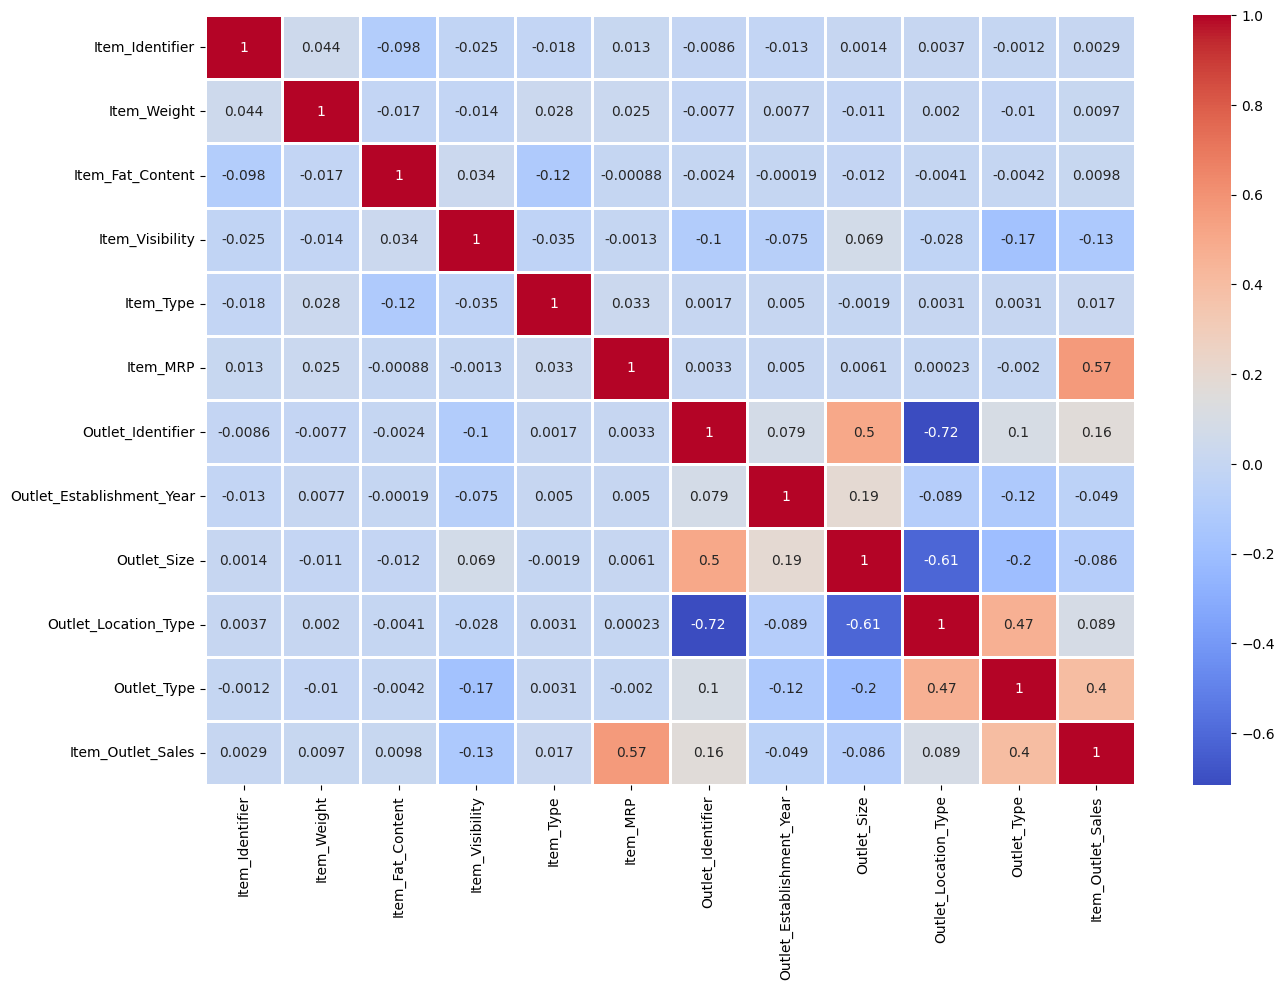

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',cbar=True,linewidths=0.75)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

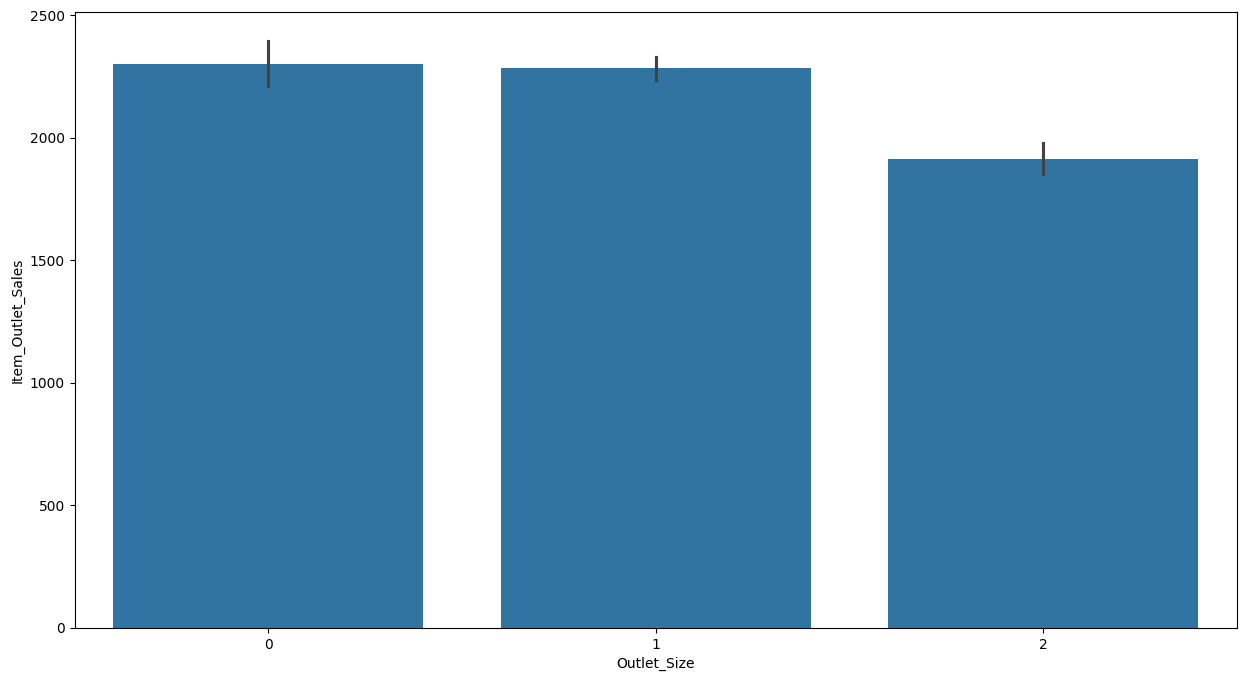

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

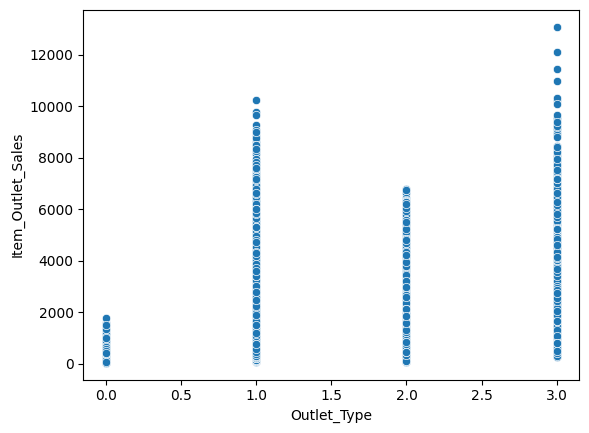

In [37]:
sns.scatterplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

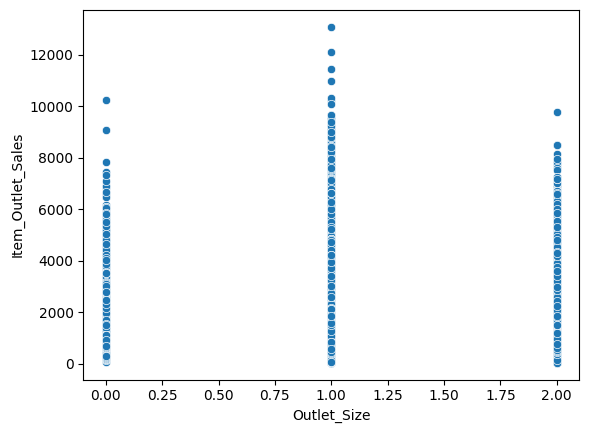

In [38]:
sns.scatterplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

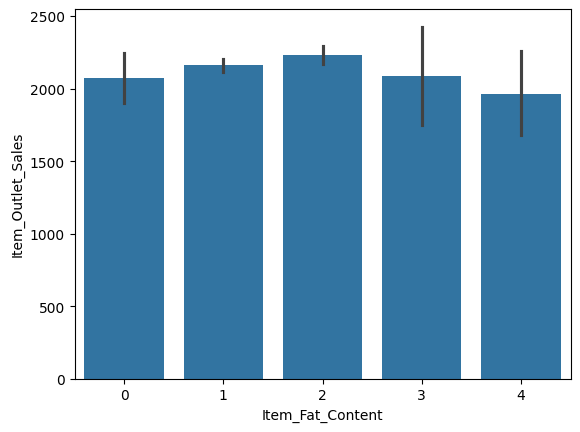

In [39]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)

In [72]:
df[df['Outlet_Establishment_Year']==1999]['Item_Outlet_Sales'].mean()

2348.3546346236562

In [73]:
df[df['Outlet_Establishment_Year']==1997]['Item_Outlet_Sales'].mean()

2277.8442668817206

In [74]:
df[df['Outlet_Establishment_Year']==1985]['Item_Outlet_Sales'].mean()

2483.6774743677374

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

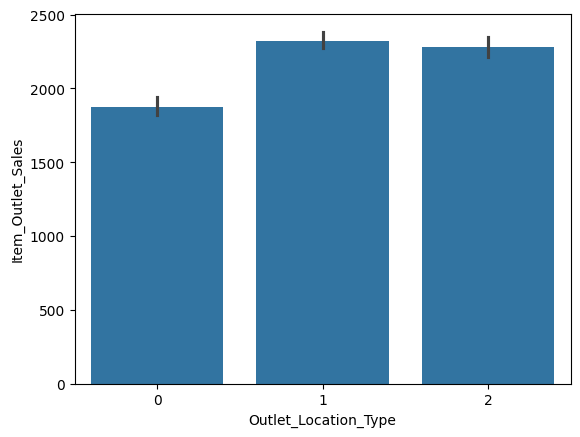

In [65]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

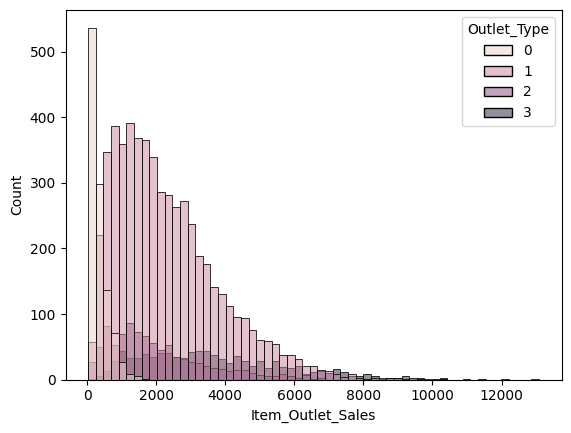

In [44]:
sns.histplot(x='Item_Outlet_Sales',data=df,color='yellow',hue='Outlet_Type')

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

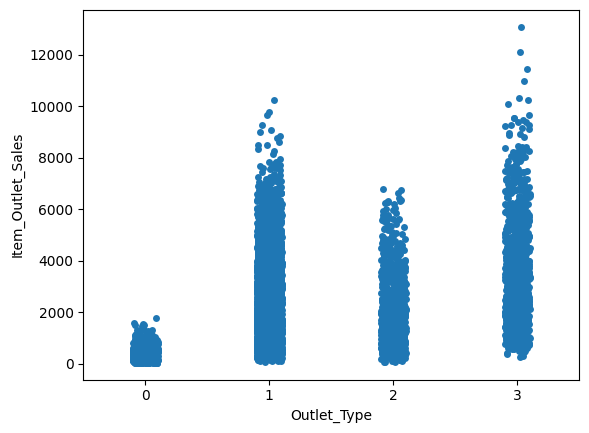

In [45]:
sns.stripplot(y='Item_Outlet_Sales',x='Outlet_Type',data=df)

In [46]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [53]:
df.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Item_Type
0     1952.971207
1     2204.132226
2     2111.808651
3     2225.194904
4     2232.542597
5     2132.867744
6     2289.009592
7     2139.221622
8     2010.000265
9     2258.784300
10    2158.977911
11    1926.139702
12    2326.065928
13    2277.321739
14    2006.511735
15    2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [49]:
x['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [59]:
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()

Item_Fat_Content
0    2073.551928
1    2164.477336
2    2235.186702
3    2087.740737
4    1962.192268
Name: Item_Outlet_Sales, dtype: float64

In [60]:
x['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [61]:
df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()

Outlet_Size
0    2.142664e+06
1    1.188225e+07
2    4.566212e+06
Name: Item_Outlet_Sales, dtype: float64

In [62]:
x['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [63]:
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()

Outlet_Location_Type
0    4.482059e+06
1    6.472314e+06
2    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

In [64]:
x['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [76]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()

Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

In [79]:
x.groupby(['Outlet_Establishment_Year','Outlet_Type',])['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [81]:
x.groupby(['Outlet_Establishment_Year','Outlet_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].mean()

Outlet_Establishment_Year  Outlet_Type        Outlet_Location_Type
1985                       Grocery Store      Tier 1                   340.329723
                           Supermarket Type3  Tier 3                  3694.038558
1987                       Supermarket Type1  Tier 3                  2298.995256
1997                       Supermarket Type1  Tier 1                  2277.844267
1998                       Grocery Store      Tier 3                   339.351662
1999                       Supermarket Type1  Tier 1                  2348.354635
2002                       Supermarket Type1  Tier 2                  2192.384798
2004                       Supermarket Type1  Tier 2                  2438.841866
2007                       Supermarket Type1  Tier 2                  2340.675263
2009                       Supermarket Type2  Tier 3                  1995.498739
Name: Item_Outlet_Sales, dtype: float64

In [84]:
x.groupby(['Outlet_Establishment_Year','Item_Type','Item_Fat_Content'])['Item_Outlet_Sales'].mean()

Outlet_Establishment_Year  Item_Type      Item_Fat_Content
1985                       Baking Goods   LF                  1775.244733
                                          Low Fat             1732.824855
                                          Regular             2786.690768
                                          low fat             1306.077667
                                          reg                  617.862400
                                                                 ...     
2009                       Soft Drinks    low fat              644.494400
                           Starchy Foods  LF                  2783.044000
                                          Low Fat             1615.991714
                                          Regular             1803.937543
                                          reg                 3605.307000
Name: Item_Outlet_Sales, Length: 485, dtype: float64

In [86]:
x.groupby(['Outlet_Establishment_Year','Item_Type'])['Item_Outlet_Sales'].mean()

Outlet_Establishment_Year  Item_Type    
1985                       Baking Goods     2127.730350
                           Breads           2456.731170
                           Breakfast        2580.704210
                           Canned           2626.272311
                           Dairy            2400.530421
                                               ...     
2009                       Others           1853.620490
                           Seafood          3166.639914
                           Snack Foods      2111.473733
                           Soft Drinks      1923.814626
                           Starchy Foods    1947.699988
Name: Item_Outlet_Sales, Length: 144, dtype: float64

In [87]:
x.groupby(['Outlet_Establishment_Year','Item_Fat_Content',])['Item_Outlet_Sales'].mean()

Outlet_Establishment_Year  Item_Fat_Content
1985                       LF                  2162.542179
                           Low Fat             2477.892578
                           Regular             2584.489416
                           low fat             1827.383214
                           reg                 1653.544564
1987                       LF                  2017.644481
                           Low Fat             2336.304175
                           Regular             2263.217991
                           low fat             2580.603811
                           reg                 1867.364138
1997                       LF                  2264.471159
                           Low Fat             2202.108171
                           Regular             2370.391563
                           low fat             2618.781629
                           reg                 3138.359267
1998                       LF                   346.753762
            

In [88]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044218,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044218,1.000000,-0.017255,-0.014168,0.028038,0.024951,-0.007666,0.007739,-0.010536,0.001958,-0.009973,0.009693
Item_Fat_Content,-0.098114,-0.017255,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.014168,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028038,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024951,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007666,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,0.007739,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.010536,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.001958,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

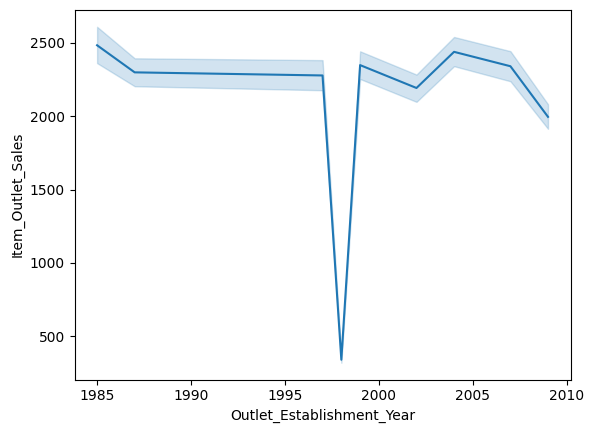

In [89]:

sns.lineplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

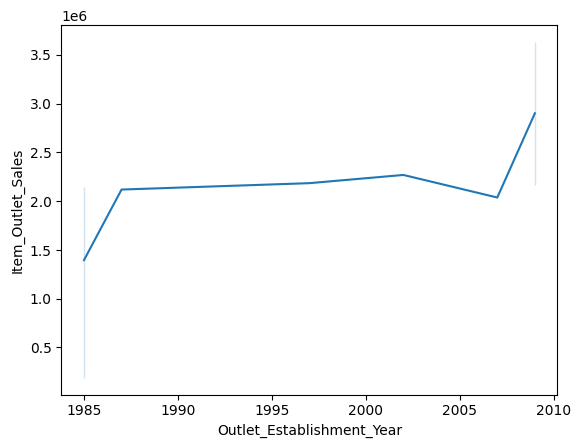

In [93]:
Y=df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()
sns.lineplot(x='Outlet_Establishment_Year',y=Y,data=df)

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 799.2+ KB


In [94]:
df.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

Model Building,Training and Testing

In [95]:
X=df.drop(columns=['Item_Outlet_Sales'],axis=1)

In [96]:
Y=df['Item_Outlet_Sales']

In [98]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [107]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=43)

In [108]:
regressor = XGBRegressor()

In [109]:

regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [110]:
training_data_prediction = regressor.predict(X_train)

In [111]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [112]:
print(r2_train)

0.8824371995260512


In [113]:
test_data_prediction = regressor.predict(X_test)

In [114]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [115]:
print('R Squared value = ', r2_test)

R Squared value =  0.5310452762434807


Standardisation and Normalisation

In [116]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [117]:

from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['Item_Weight','Item_Visibility','Item_MRP']

# apply standardization on numerical features
for i in num_cols:

    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])

    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])

    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [120]:
from sklearn.neighbors import KNeighborsRegressor
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# knn
knn = KNeighborsRegressor(n_neighbors=7)

rmse = []

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):

    # fit
    knn.fit(trainX[i],Y_train)
    # predict
    pred = knn.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(Y_test,pred)))

In [121]:
print(rmse)

[1527.1449215264474, 1152.530949225668, 1607.120425874837]


In [124]:
# training an SVR model
from  sklearn.svm import SVR
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# SVR
svr = SVR(kernel='rbf',C=5)

rmse = []

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):

    # fit
    svr.fit(trainX[i],Y_train)
    # predict
    pred = svr.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(Y_test,pred)))


In [125]:
rmse

[1704.4203865111365, 1454.2407147658034, 1758.5282818923663]